In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset directly from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280/OD315", "Proline"
]
df = pd.read_csv(url, header=None, names=column_names)

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Summary of the dataset
print("Dataset shape:", df.shape)
print("\nDescriptive statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Dataset shape: (178, 14)

Descriptive statistics:


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Missing values in each column:
Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


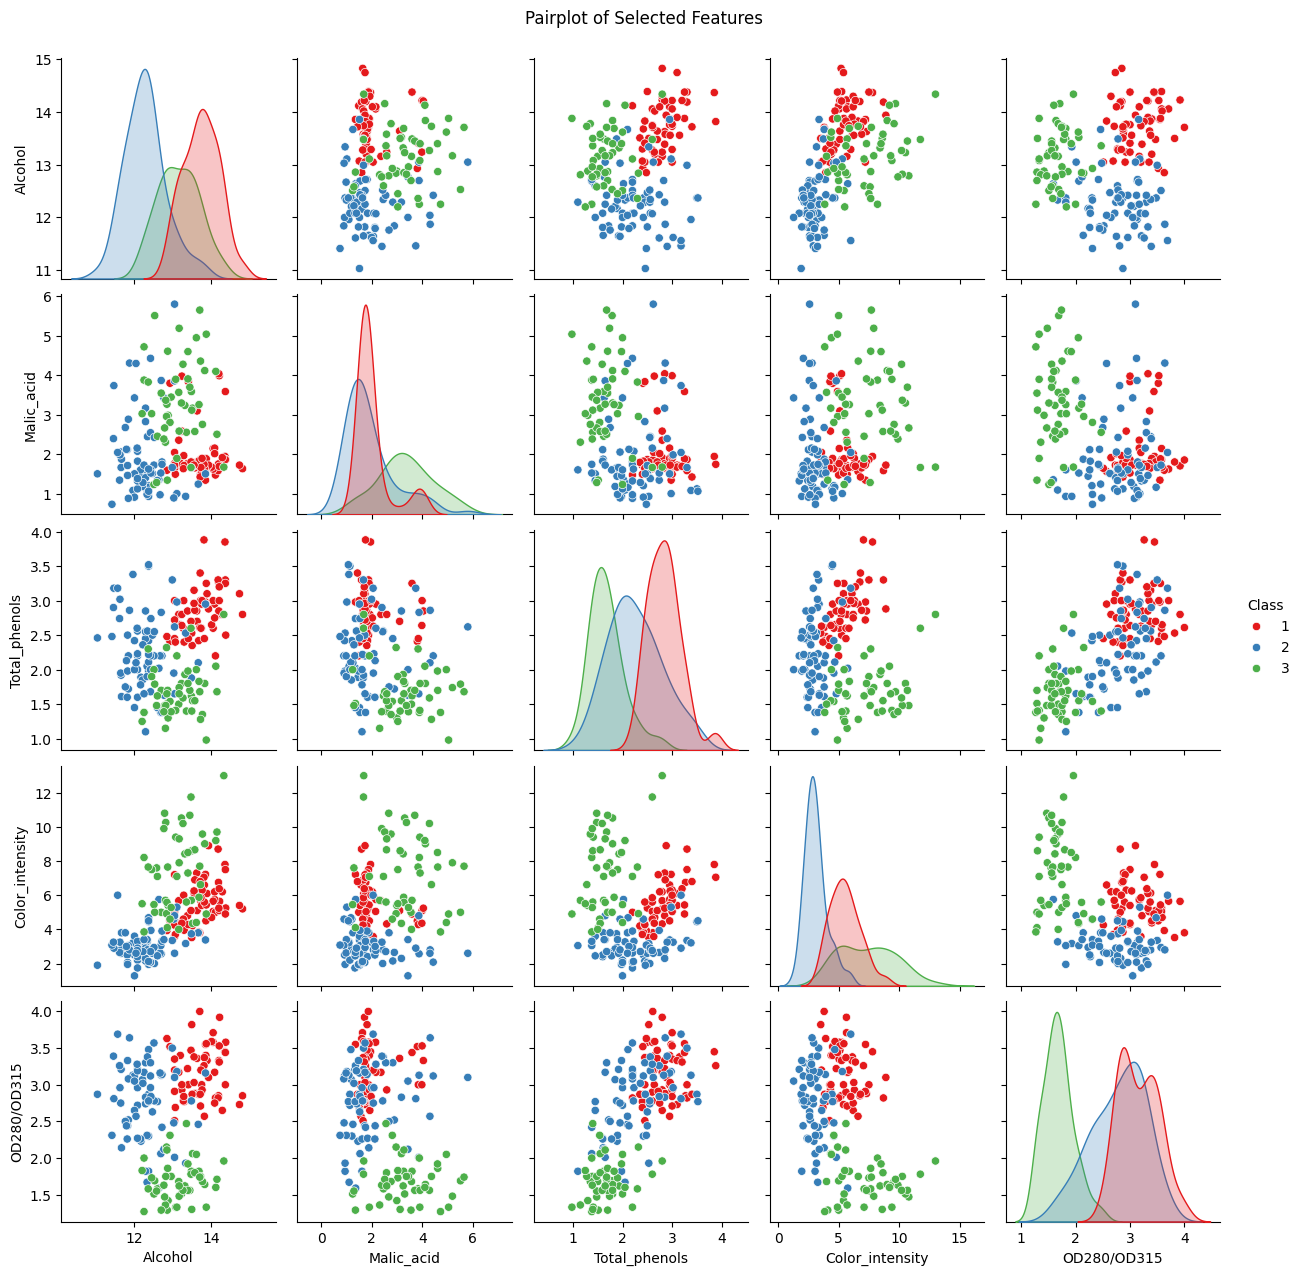

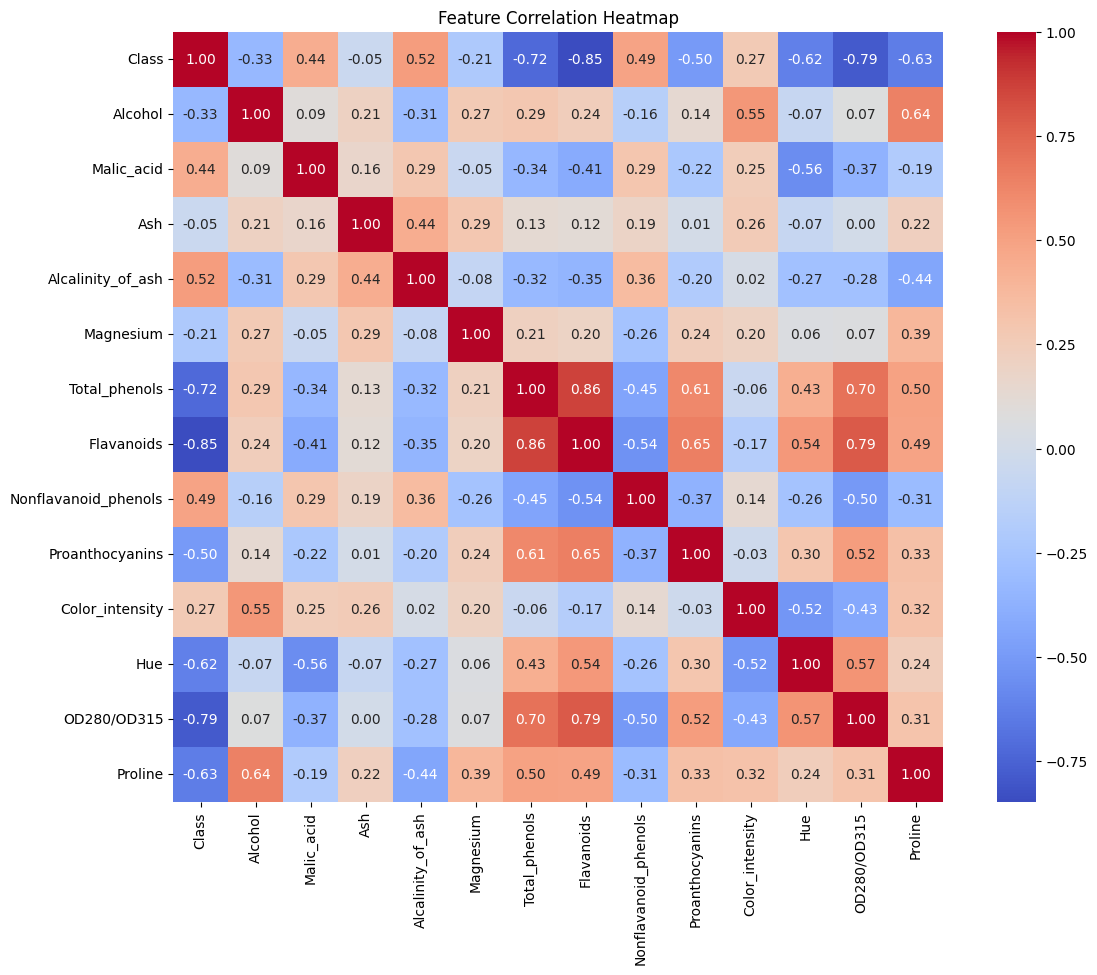

In [2]:
# Pairplot of selected features to observe class distribution
sns.pairplot(df.iloc[:, [0, 1, 2, 6, 10, 12]], hue="Class", palette="Set1")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Correlation heatmap of all features
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes to verify
print("Training feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training feature shape: (142, 13)
Test feature shape: (36, 13)
Training labels shape: (142,)
Test labels shape: (36,)


In [24]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#Ensure all are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [41]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = []

            for i in range(len(self.X_train)):
                if self.metric == "euclidean":
                    d = np.linalg.norm(test_point - self.X_train[i])
                elif self.metric == "manhattan":
                    d = np.sum(np.abs(test_point - self.X_train[i]))
                elif self.metric == "chebyshev":
                    d = np.max(np.abs(test_point - self.X_train[i]))
                else:
                    raise ValueError("Unknown distance metric")

                distances.append((d, self.y_train[i]))

            # Sort distances and pick k nearest
            distances.sort(key=lambda x: x[0])
            neighbors = [label for (_, label) in distances[:self.k]]

            # Vote
            vote = Counter(neighbors).most_common(1)[0][0]
            predictions.append(vote)

        return np.array(predictions)




========== DISTANCE METRIC: EUCLIDEAN ==========


>>> K = 1
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


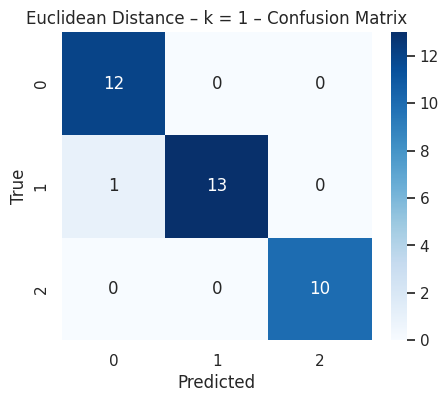

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 1 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 3
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


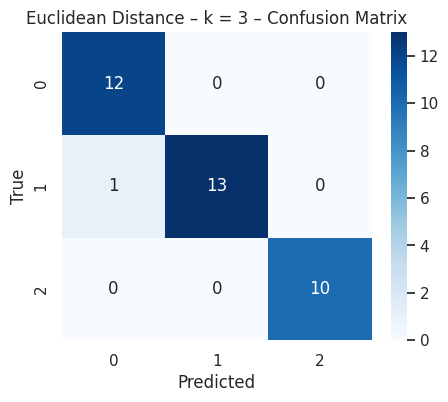

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 1 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 5
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]


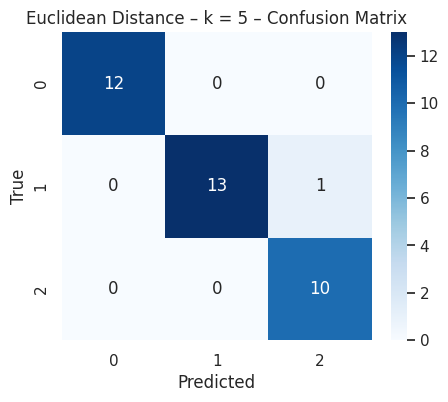

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 7
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


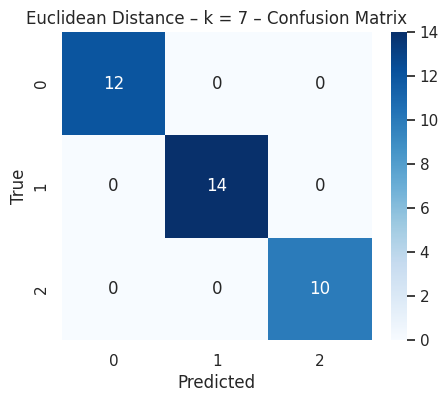

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 9
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


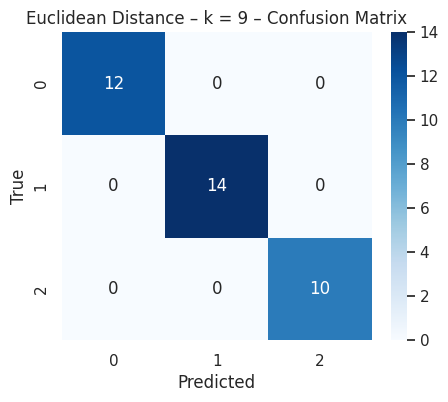

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 11
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


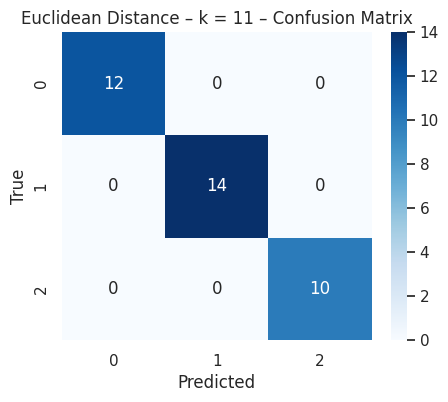

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 13
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


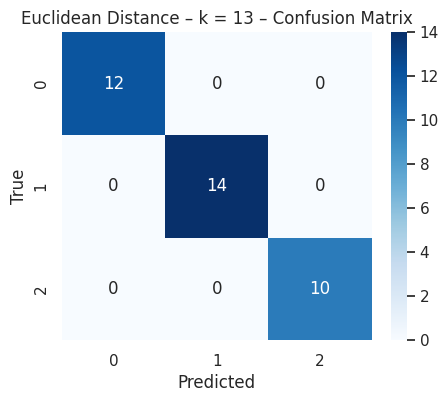

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]


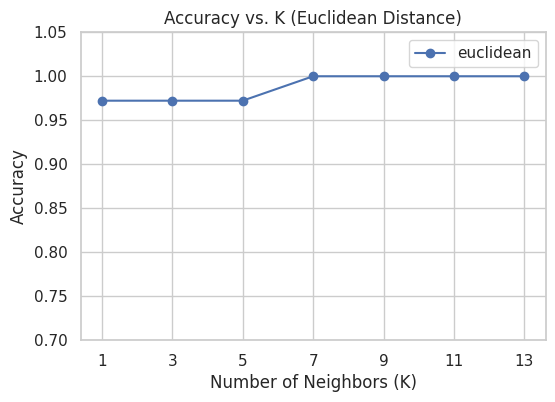



========== DISTANCE METRIC: MANHATTAN ==========


>>> K = 1
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


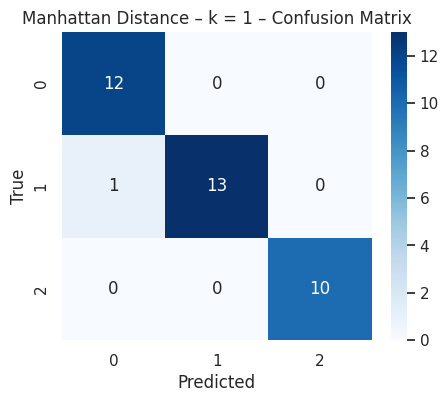

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 1 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 3
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


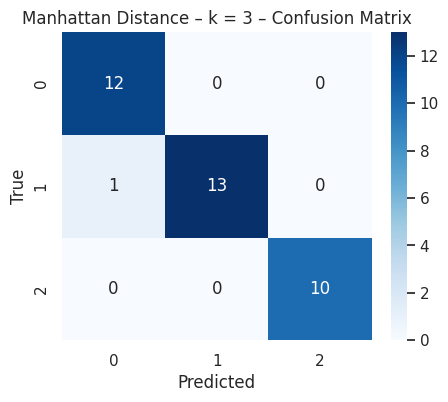

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 1 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 5
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


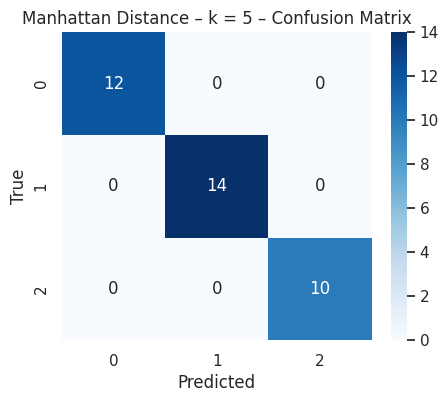

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 7
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


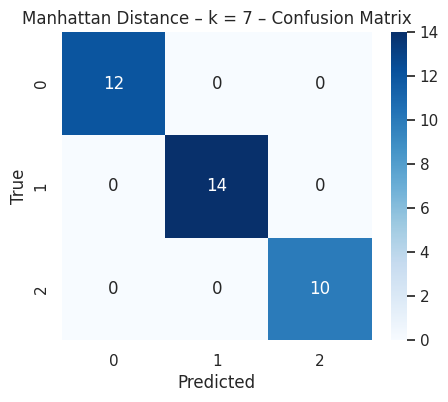

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 9
Accuracy: 1.0000
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


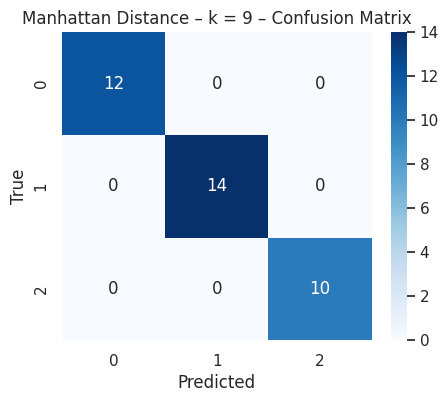

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

First 10 Predictions: [1 3 1 2 2 1 1 2 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 11
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


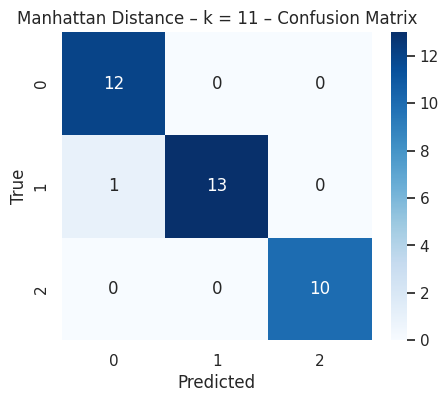

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 2 2 1 1 1 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 13
Accuracy: 0.9722
Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


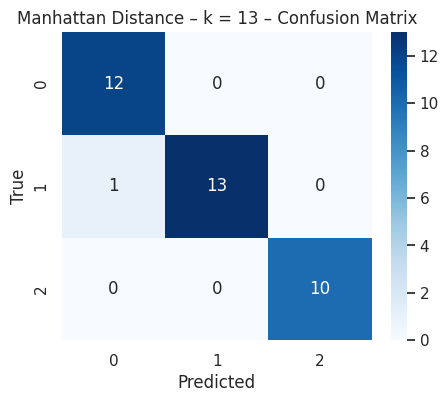

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

First 10 Predictions: [1 3 1 2 2 1 1 1 2 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]


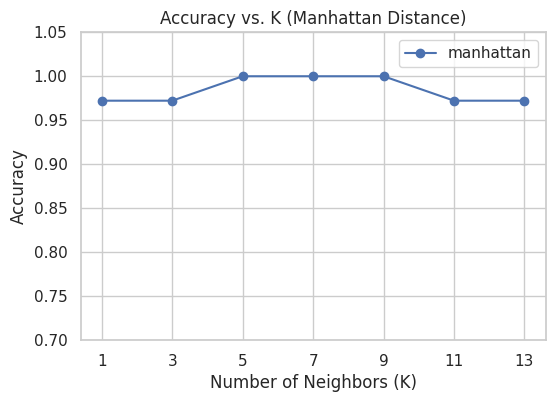



========== DISTANCE METRIC: CHEBYSHEV ==========


>>> K = 1
Accuracy: 0.8611
Confusion Matrix:
[[12  0  0]
 [ 0 12  2]
 [ 0  3  7]]


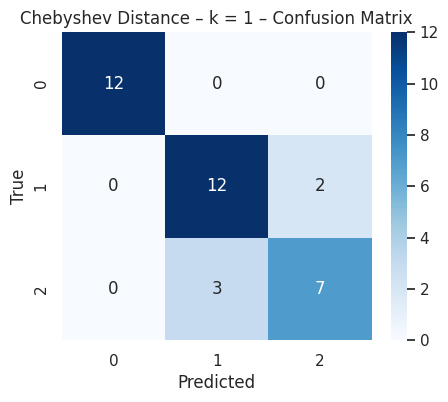

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.80      0.86      0.83        14
           3       0.78      0.70      0.74        10

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36

First 10 Predictions: [1 2 1 2 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 3
Accuracy: 0.8611
Confusion Matrix:
[[12  0  0]
 [ 1 11  2]
 [ 0  2  8]]


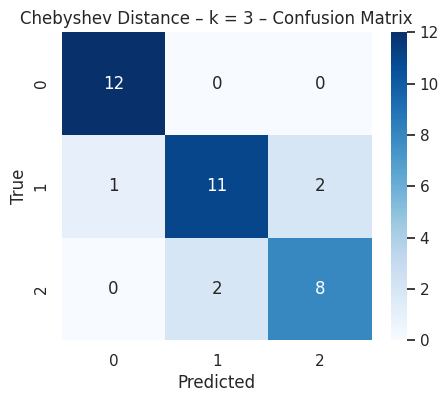

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.85      0.79      0.81        14
           3       0.80      0.80      0.80        10

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36

First 10 Predictions: [1 2 1 1 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 5
Accuracy: 0.8611
Confusion Matrix:
[[12  0  0]
 [ 1 11  2]
 [ 0  2  8]]


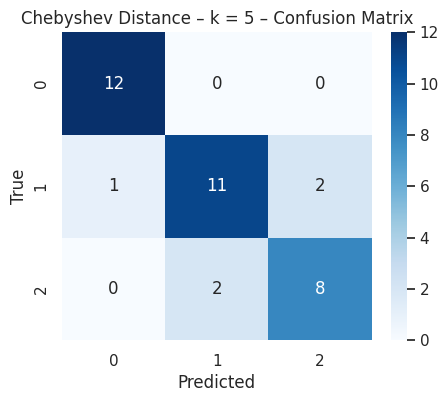

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.85      0.79      0.81        14
           3       0.80      0.80      0.80        10

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36

First 10 Predictions: [1 2 1 1 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 7
Accuracy: 0.8889
Confusion Matrix:
[[12  0  0]
 [ 1 12  1]
 [ 0  2  8]]


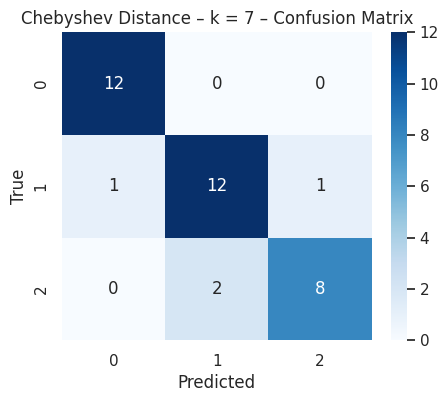

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.86      0.86      0.86        14
           3       0.89      0.80      0.84        10

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36

First 10 Predictions: [1 2 1 1 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 9
Accuracy: 0.9167
Confusion Matrix:
[[12  0  0]
 [ 1 12  1]
 [ 0  1  9]]


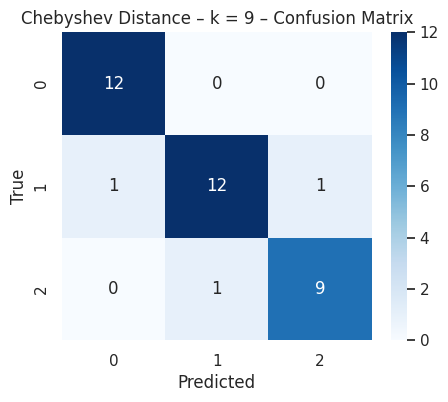

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

First 10 Predictions: [1 2 1 1 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 11
Accuracy: 0.9167
Confusion Matrix:
[[12  0  0]
 [ 1 12  1]
 [ 0  1  9]]


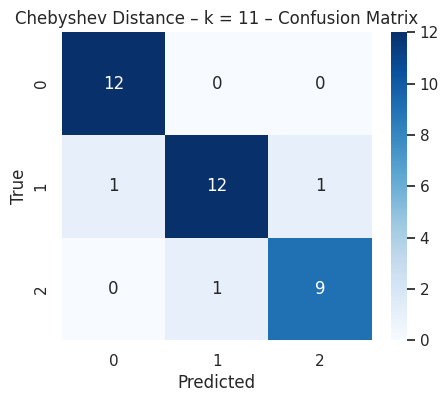

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

First 10 Predictions: [1 2 1 1 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]

>>> K = 13
Accuracy: 0.9167
Confusion Matrix:
[[12  0  0]
 [ 1 12  1]
 [ 0  1  9]]


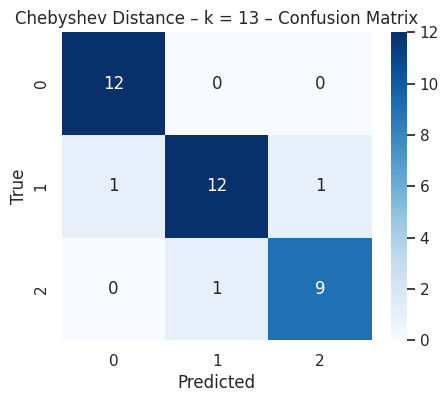

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

First 10 Predictions: [1 2 1 1 2 1 1 2 3 3]
First 10 True Labels: [1 3 1 2 2 1 1 2 2 3]


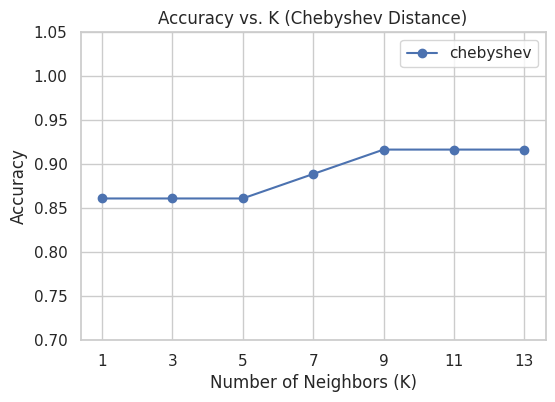

In [42]:
from knn import KNNClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define values
k_values = [1,3,5,7,9,11,13]
distance_metrics = ["euclidean", "manhattan", "chebyshev"]

# Save all results
all_results = {}

# Iterate through each distance metric
for metric in distance_metrics:
    print(f"\n\n========== DISTANCE METRIC: {metric.upper()} ==========\n")
    accuracy_list = []

    for k in k_values:
        print(f"\n>>> K = {k}")

        # Initialize and train classifier
        model = KNNClassifier(k=k, distance_metric=metric)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracy_list.append(acc)
        print(f"Accuracy: {acc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Heatmap for Confusion Matrix
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{metric.title()} Distance – k = {k} – Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Show predictions (optional but useful for debugging)
        print("First 10 Predictions:", y_pred[:10])
        print("First 10 True Labels:", y_test[:10])

    # Store accuracy values
    all_results[metric] = accuracy_list

    # Plot accuracy vs. k for this metric
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, accuracy_list, marker='o', linestyle='-', label=metric)
    plt.title(f"Accuracy vs. K ({metric.title()} Distance)")
    plt.xlabel("Number of Neighbors (K)")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.ylim(0.7, 1.05)
    plt.grid(True)
    plt.legend()
    plt.show()


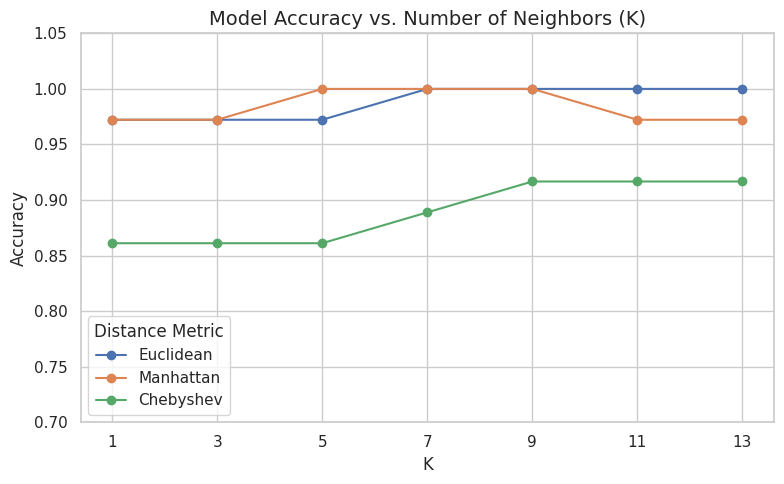

In [43]:
plt.figure(figsize=(8, 5))
for metric in distance_metrics:
    plt.plot(k_values, all_results[metric], marker='o', linestyle='-', label=f"{metric.title()}")

plt.title("Model Accuracy vs. Number of Neighbors (K)", fontsize=14)
plt.xlabel("K", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(k_values)
plt.ylim(0.7, 1.05)
plt.legend(title="Distance Metric")
plt.grid(True)
plt.tight_layout()
plt.show()




========== DISTANCE METRIC: EUCLIDEAN ==========


>>> K = 1
✅ Accuracy: 0.9722


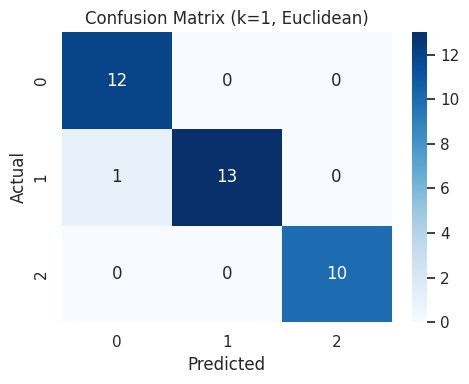

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


>>> K = 3
✅ Accuracy: 0.9722


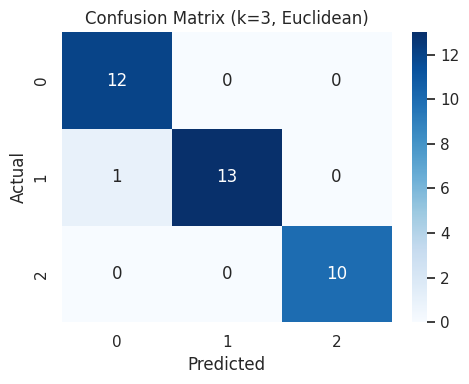

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


>>> K = 5
✅ Accuracy: 0.9722


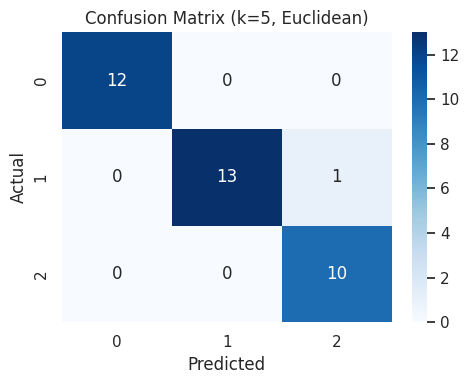

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


>>> K = 7
✅ Accuracy: 1.0000


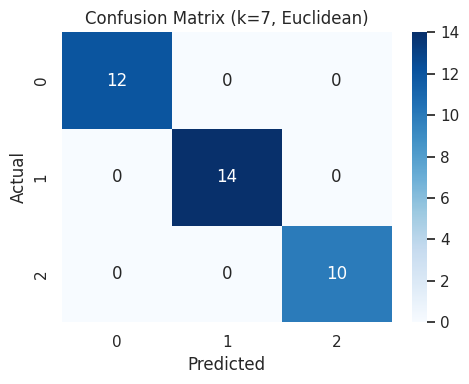

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


>>> K = 9
✅ Accuracy: 1.0000


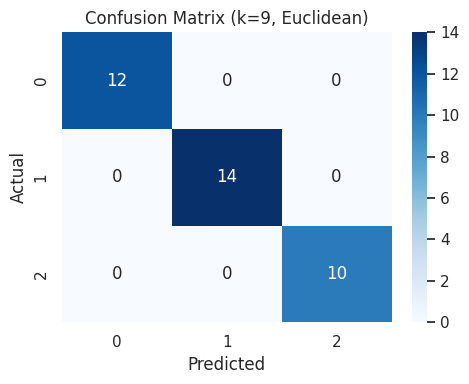

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


>>> K = 11
✅ Accuracy: 1.0000


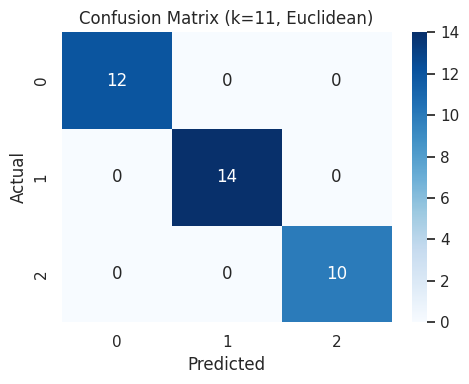

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


>>> K = 13
✅ Accuracy: 1.0000


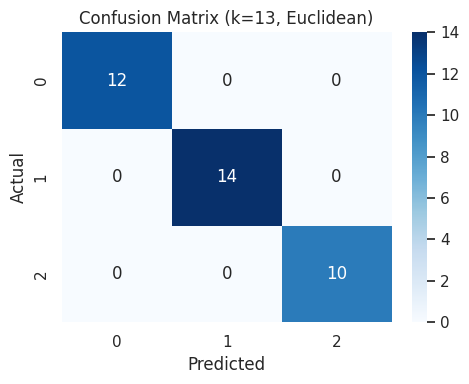

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



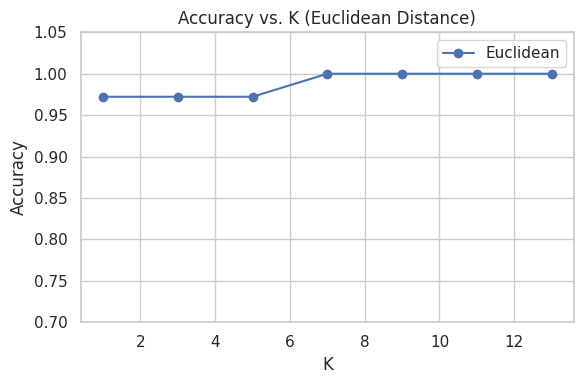



========== DISTANCE METRIC: MANHATTAN ==========


>>> K = 1
✅ Accuracy: 0.9722


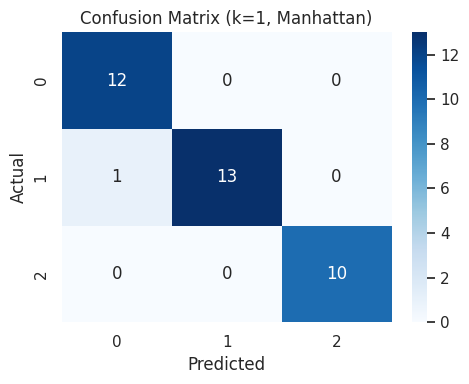

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


>>> K = 3
✅ Accuracy: 0.9722


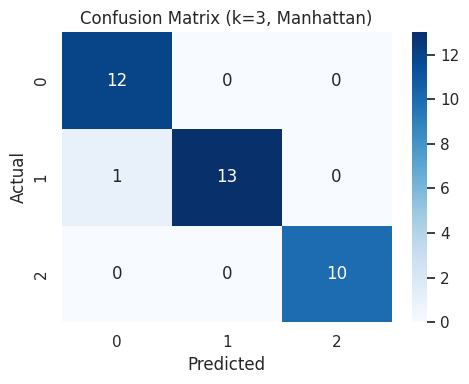

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


>>> K = 5
✅ Accuracy: 1.0000


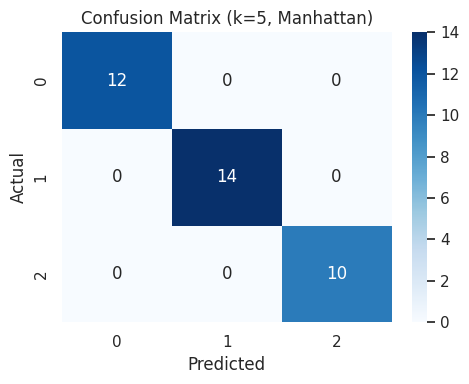

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


>>> K = 7
✅ Accuracy: 1.0000


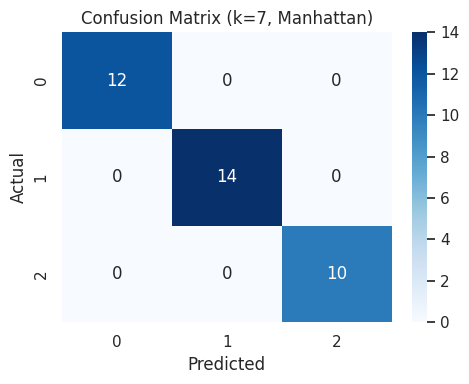

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


>>> K = 9
✅ Accuracy: 1.0000


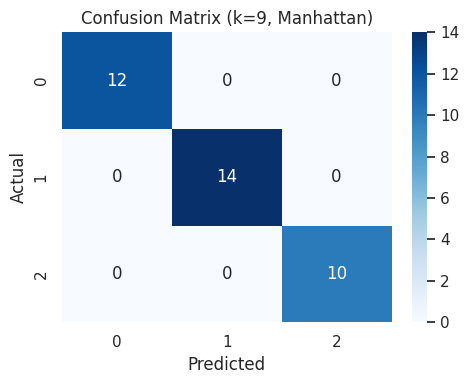

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


>>> K = 11
✅ Accuracy: 0.9722


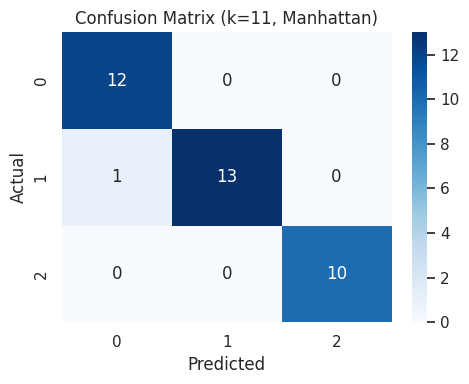

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


>>> K = 13
✅ Accuracy: 0.9722


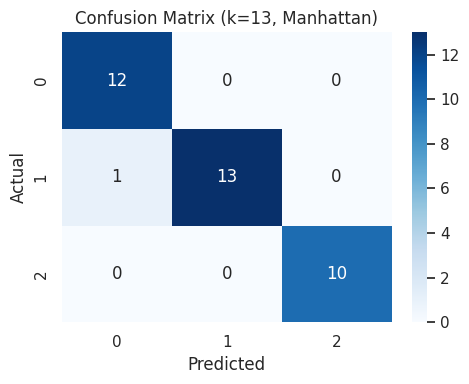

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



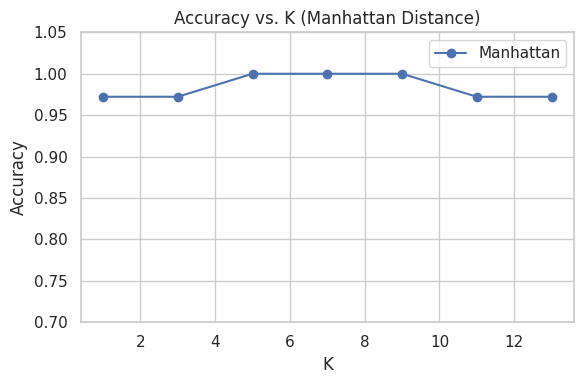



========== DISTANCE METRIC: CHEBYSHEV ==========


>>> K = 1
✅ Accuracy: 0.8611


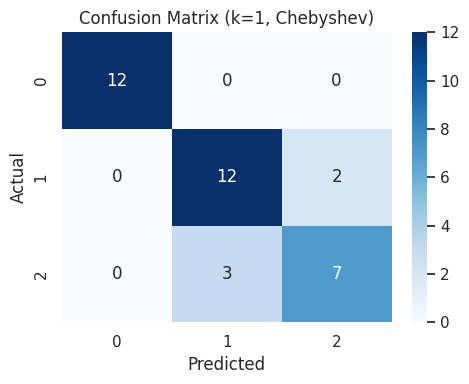

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.80      0.86      0.83        14
           3       0.78      0.70      0.74        10

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36


>>> K = 3
✅ Accuracy: 0.8611


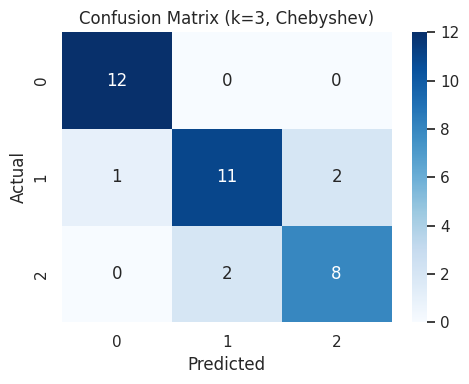

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.85      0.79      0.81        14
           3       0.80      0.80      0.80        10

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


>>> K = 5
✅ Accuracy: 0.8611


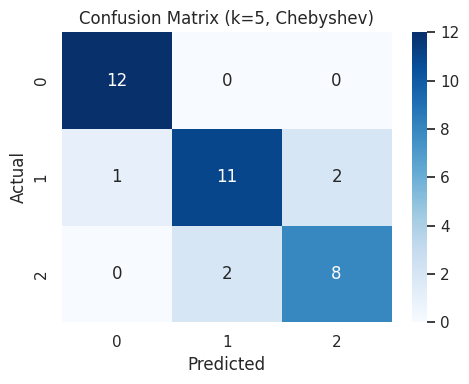

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.85      0.79      0.81        14
           3       0.80      0.80      0.80        10

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


>>> K = 7
✅ Accuracy: 0.8889


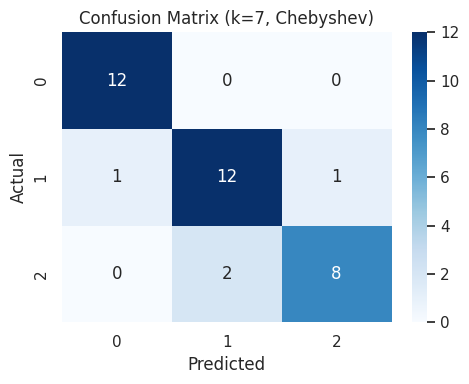

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.86      0.86      0.86        14
           3       0.89      0.80      0.84        10

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36


>>> K = 9
✅ Accuracy: 0.9167


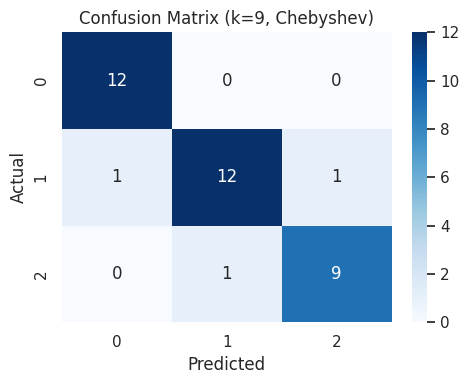

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


>>> K = 11
✅ Accuracy: 0.9167


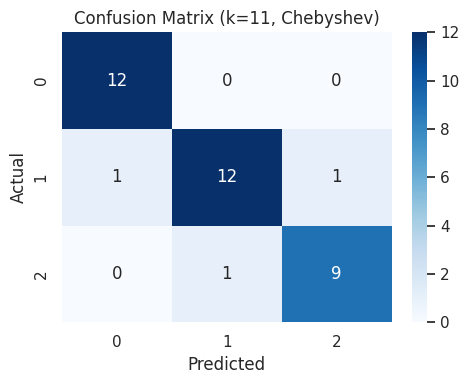

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


>>> K = 13
✅ Accuracy: 0.9167


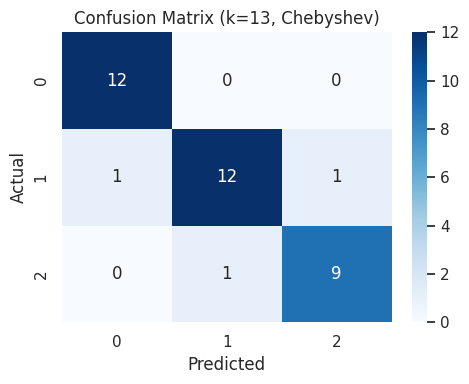

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.86      0.89        14
           3       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



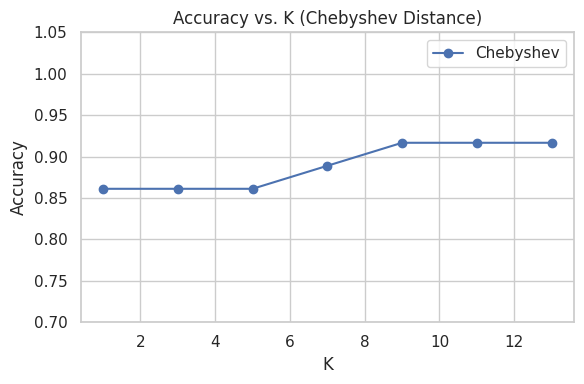

In [47]:
import os
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create folder for figures
os.makedirs("confusion_matrices", exist_ok=True)

# Define values
k_values = [1,3,5,7,9,11,13]
distance_metrics = ["euclidean", "manhattan", "chebyshev"]

# Save results
all_results = {}

for metric in distance_metrics:
    print(f"\n\n========== DISTANCE METRIC: {metric.upper()} ==========\n")
    accuracy_list = []

    for k in k_values:
        print(f"\n>>> K = {k}")

        model = KNNClassifier(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracy_list.append(acc)
        print(f"✅ Accuracy: {acc:.4f}")

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix (k={k}, {metric.title()})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        path = f"confusion_matrices/cm_k{k}_{metric}.png"
        plt.savefig(path)
        plt.show()

        # Save report as text for k = 5 (or all if you want)
        print(classification_report(y_test, y_pred))
        with open(f"confusion_matrices/classification_report_k{k}_{metric}.txt", "w") as f:
                f.write(classification_report(y_test, y_pred))

    all_results[metric] = accuracy_list

    # Accuracy plot for this metric
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, accuracy_list, marker='o', label=f"{metric.title()}")
    plt.title(f"Accuracy vs. K ({metric.title()} Distance)")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.ylim(0.7, 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"confusion_matrices/accuracy_plot_{metric}.png")
    plt.show()


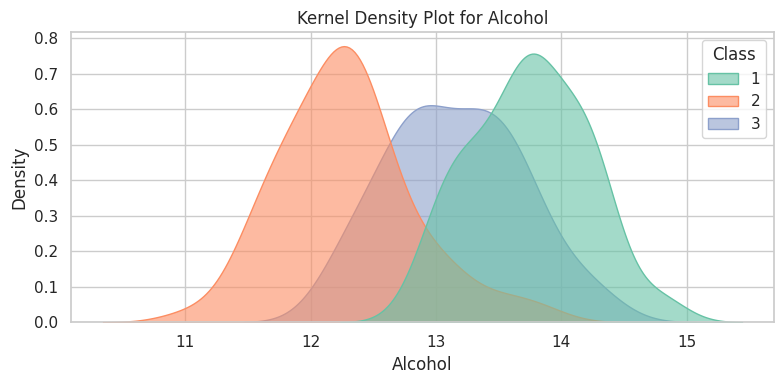

<Figure size 640x480 with 0 Axes>

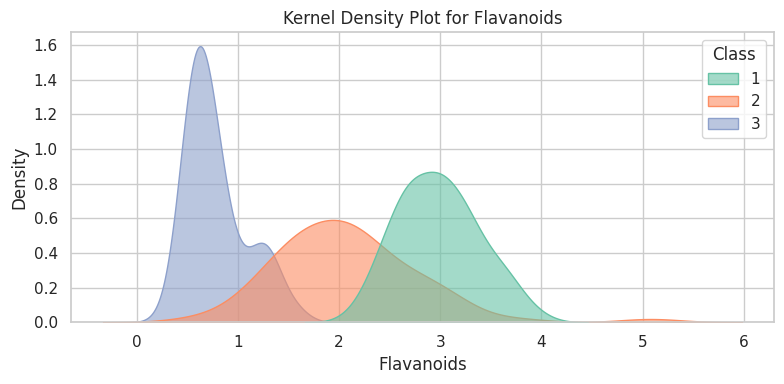

<Figure size 640x480 with 0 Axes>

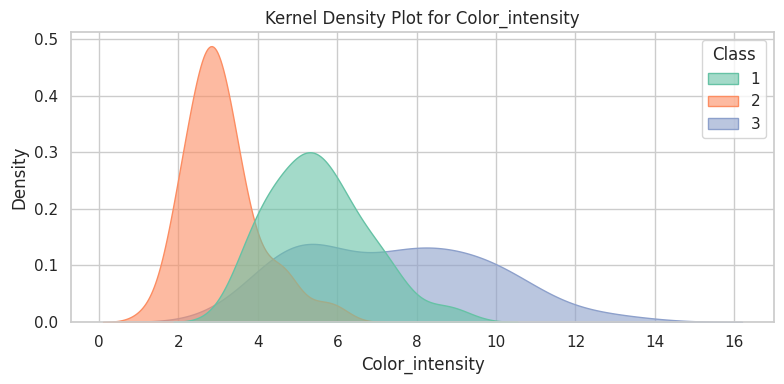

<Figure size 640x480 with 0 Axes>

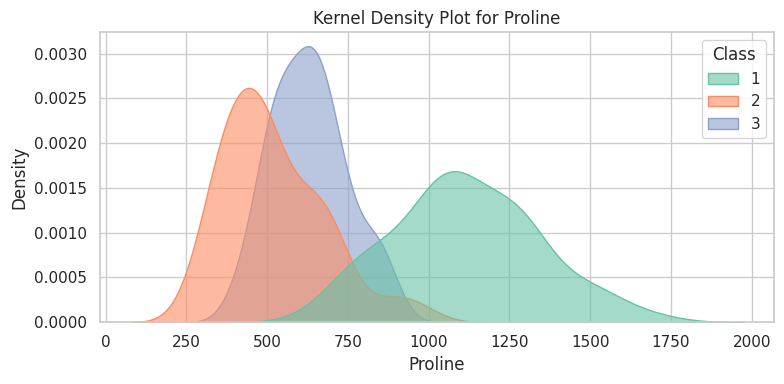

<Figure size 640x480 with 0 Axes>

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Plot KDEs for a few selected features
selected_features = ["Alcohol", "Flavanoids", "Color_intensity", "Proline"]

for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue="Class", fill=True, common_norm=False, palette="Set2", alpha=0.6)
    plt.title(f"Kernel Density Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()
    plt.savefig(f'kde_{feature}.png')



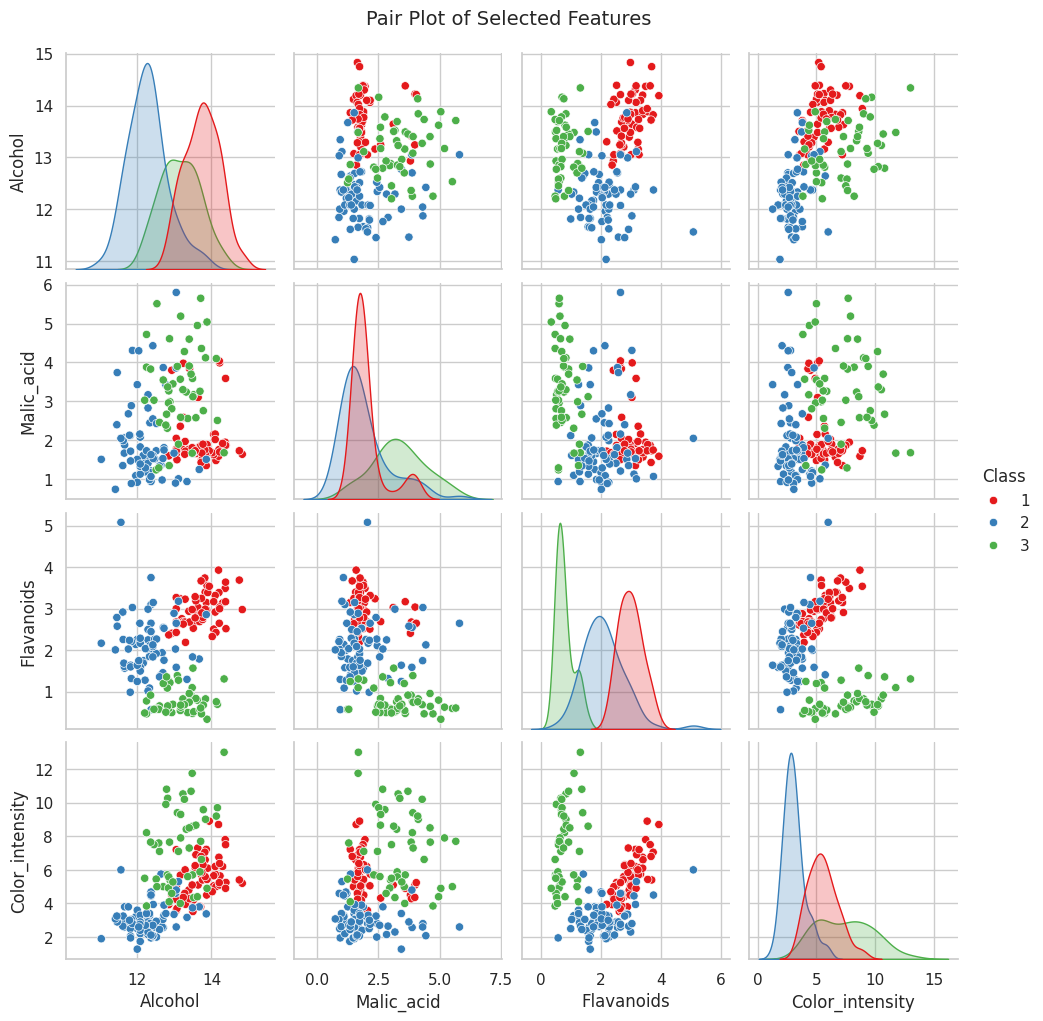

<Figure size 640x480 with 0 Axes>

In [39]:
# Select features for pairplot (max 4–5 önerilir)
pairplot_features = ["Alcohol", "Malic_acid", "Flavanoids", "Color_intensity", "Class"]

# Pair plot
sns.pairplot(df[pairplot_features], hue="Class", palette="Set1", diag_kind="kde", height=2.5)
plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=14)
plt.show()

plt.savefig(f'kde_{feature}.png')


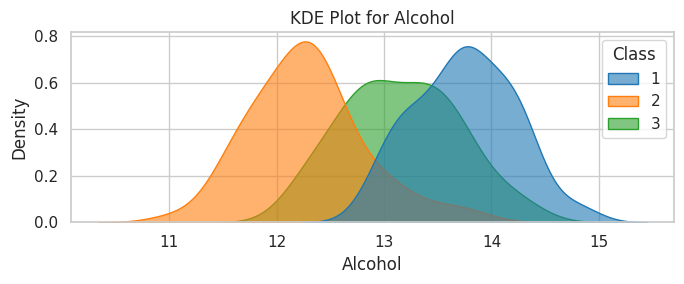

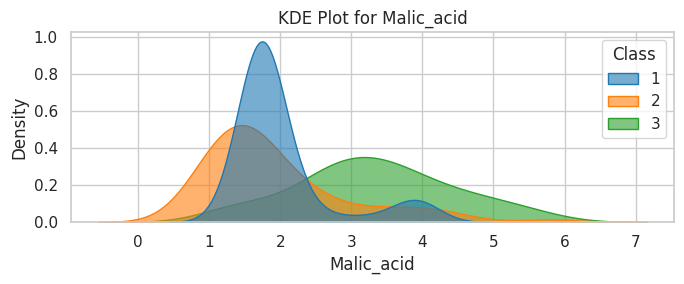

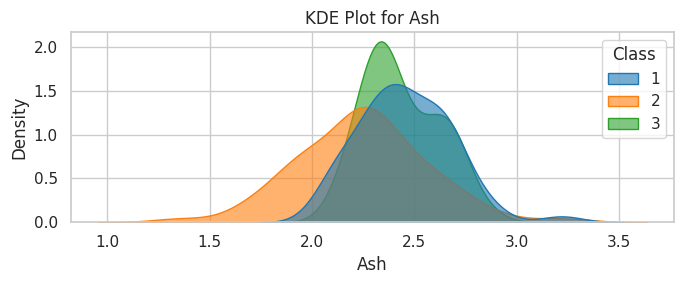

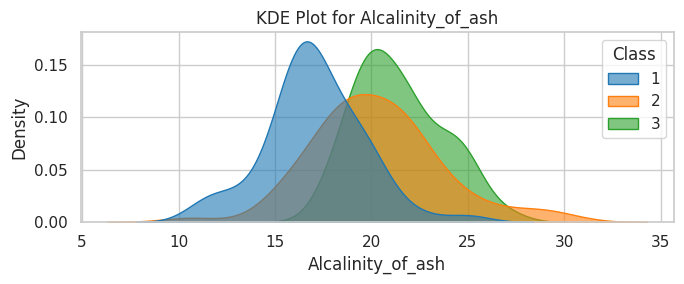

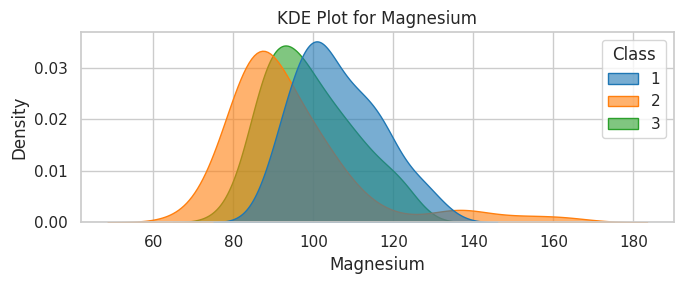

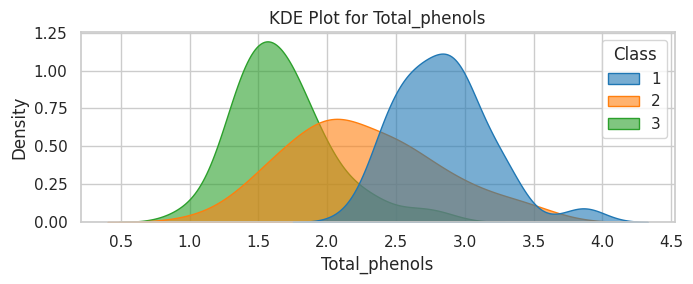

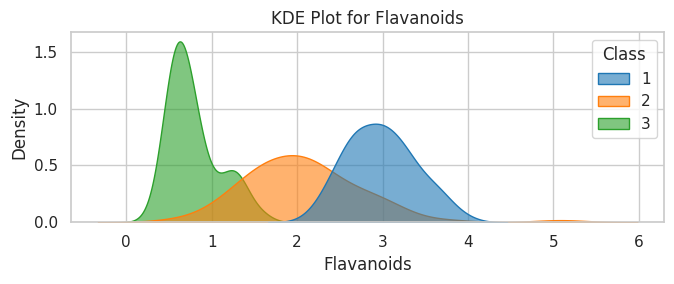

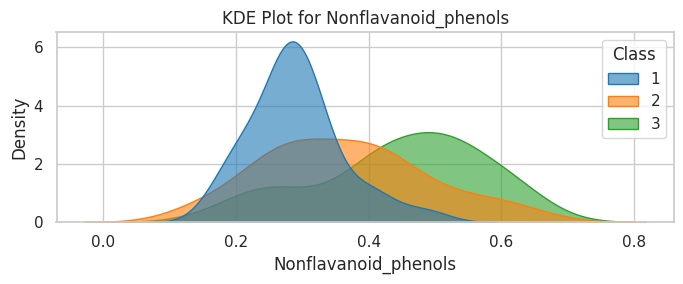

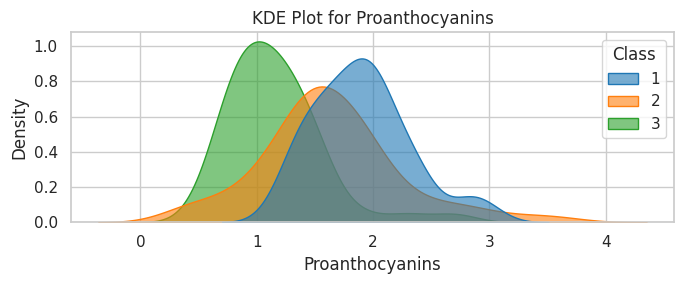

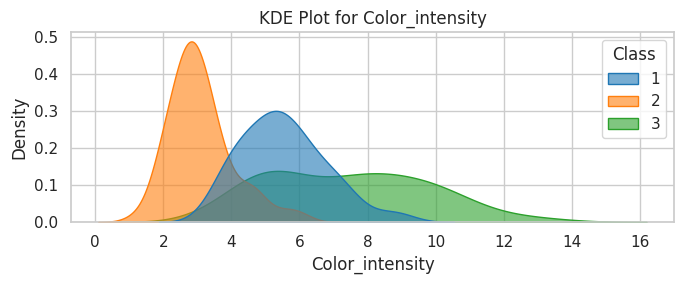

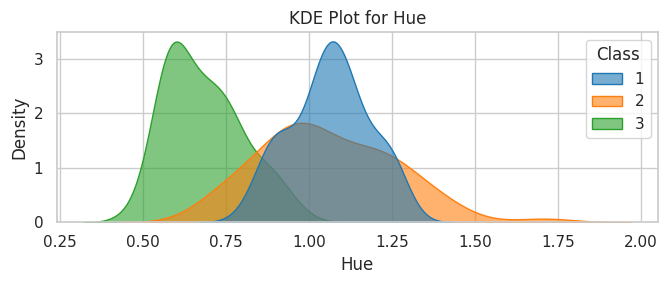

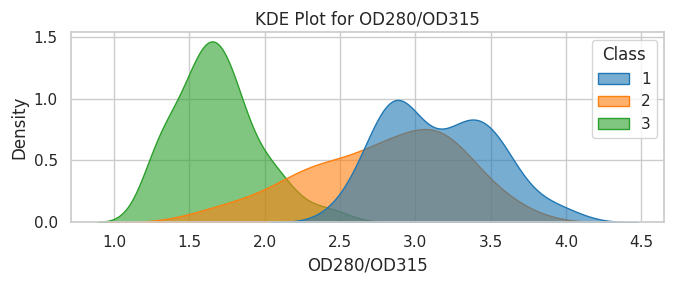

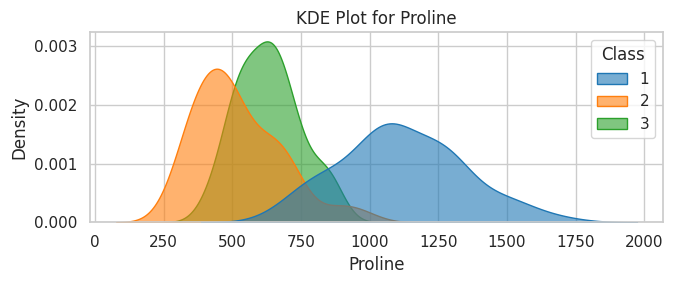

In [48]:
# Plot KDE for all numerical features
for feature in df.columns[1:]:  # skip 'Class'
    plt.figure(figsize=(7, 3))
    sns.kdeplot(data=df, x=feature, hue="Class", fill=True, common_norm=False, palette="tab10", alpha=0.6)
    plt.title(f"KDE Plot for {feature}")
    plt.tight_layout()
    plt.show()


